In [29]:
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.manifold import TSNE

In [30]:
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [31]:
dt = DecisionTreeClassifier(max_depth=1)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1),n_estimators=100)

dt.fit(X,y)
bagging.fit(X,y)

y_hat_dt = dt.predict(X)
y_hat_bag = bagging.predict(X)

print(f"DT Accuracy = {accuracy_score(y,y_hat_dt)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

DT Accuracy = 0.6666666666666666
Bagging Accuracy = 0.9533333333333334


In [32]:
dt = DecisionTreeClassifier(min_samples_leaf=1)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=1),n_estimators=100)

dt.fit(X,y)
bagging.fit(X,y)

y_hat_dt = dt.predict(X)
y_hat_bag = bagging.predict(X)

print(f"DT Accuracy = {accuracy_score(y,y_hat_dt)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

DT Accuracy = 0.9933333333333333
Bagging Accuracy = 0.9933333333333333


In [33]:
param = {'ccp_alpha' : [0.01,0.1,1,10]}
grid_search = GridSearchCV(DecisionTreeClassifier(),param)
grid_search.fit(X,y)
print(grid_search.best_params_)

{'ccp_alpha': 0.1}


In [34]:
dt = DecisionTreeClassifier(ccp_alpha=0.1)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.1),n_estimators=100)

dt.fit(X,y)
bagging.fit(X,y)

y_hat_dt = dt.predict(X)
y_hat_bag = bagging.predict(X)

print(f"DT Accuracy = {accuracy_score(y,y_hat_dt)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

DT Accuracy = 0.9533333333333334
Bagging Accuracy = 0.9533333333333334


# 2

In [35]:
X = iris.data[:]
y = iris.target

In [36]:
# lr = LinearRegression()
# bag = BaggingClassifier(estimator=LinearRegression(),n_estimators=100)

# lr.fit(X,y)
# bag.fit(X,y)

# y_hat_lr = lr.predict(X)
# y_hat_bag = bag.predict(X)

# print(f"LR Accuracy = {accuracy_score(y,y_hat_lr)}")
# print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

In [37]:
nn = KNeighborsClassifier(n_neighbors=1)
bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=1),n_estimators=100)

nn.fit(X,y)
bag.fit(X,y)

y_hat_nn = nn.predict(X)
y_hat_bag = bag.predict(X)

print(f"LR Accuracy = {accuracy_score(y,y_hat_nn)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

LR Accuracy = 1.0
Bagging Accuracy = 1.0


In [38]:
nn = KNeighborsClassifier(n_neighbors=30)
bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=30),n_estimators=100)

nn.fit(X,y)
bag.fit(X,y)

y_hat_nn = nn.predict(X)
y_hat_bag = bag.predict(X)

print(f"LR Accuracy = {accuracy_score(y,y_hat_nn)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

LR Accuracy = 0.9533333333333334
Bagging Accuracy = 0.9666666666666667


# 3

In [39]:
def compare_knn_bag(k):
    nn = KNeighborsClassifier(n_neighbors=k)
    bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=k),n_estimators=100)

    nn.fit(X,y)
    bag.fit(X,y)

    y_hat_nn = nn.predict(X)
    y_hat_bag = bag.predict(X)
    return accuracy_score(y,y_hat_nn), accuracy_score(y,y_hat_bag)

In [40]:
k = []
acc_nn = []
acc_bag = []
for i in range(1,100):
    k.append(i)
    nn, bag = compare_knn_bag(i)
    acc_nn.append(nn)
    acc_bag.append(bag)

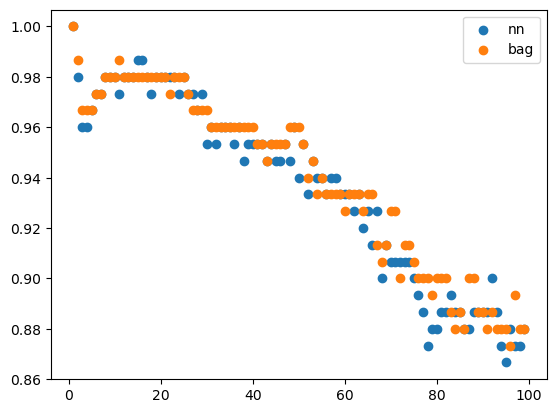

In [41]:
plt.scatter(k,acc_nn, label = 'nn')
plt.scatter(k,acc_bag, label = 'bag')
plt.legend()
plt.show()

# 5

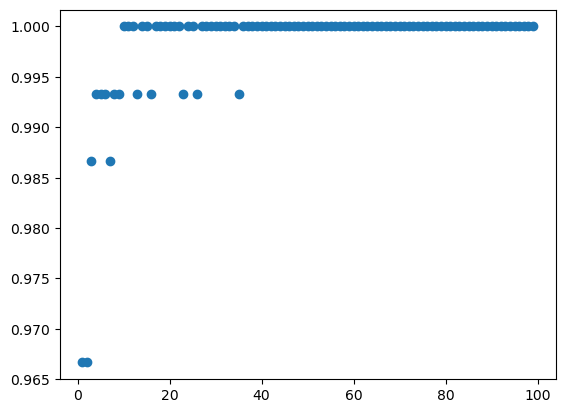

In [42]:
mtry = []
acc = []

for i in range(1,100):
    mtry.append(i)

    rt = RandomForestClassifier(n_estimators=i)
    rt.fit(X,y)
    y_hat = rt.predict(X)

    acc.append(accuracy_score(y,y_hat))

plt.scatter(mtry,acc)
plt.show()

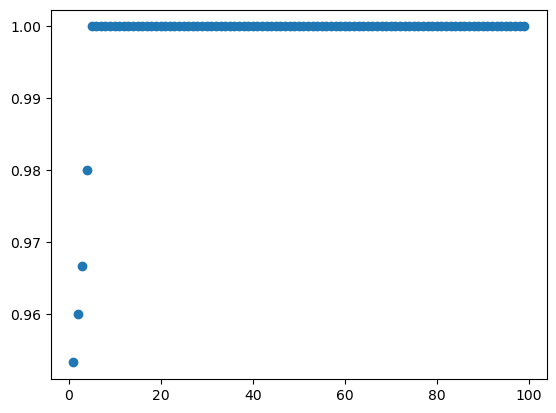

In [43]:
size = []
acc = []

for i in range(1,100):
    size.append(i)

    rt = RandomForestClassifier(max_depth=i)
    rt.fit(X,y)
    y_hat = rt.predict(X)

    acc.append(accuracy_score(y,y_hat))

plt.scatter(size,acc)
plt.show()

In [44]:
rt = RandomForestClassifier(oob_score=True,n_estimators=100)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(),oob_score=True,n_estimators=100)
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,algorithm='SAMME')

rt.fit(X,y)
bag.fit(X,y)
ada.fit(X,y)

print(rt.oob_score_)
print(bag.oob_score_)

scores_rt = cross_val_score(rt,X,y,n_jobs=5,cv=5,scoring='accuracy')
scores_bag = cross_val_score(bag,X,y,n_jobs=5,cv=5,scoring='accuracy')
scores_ada = cross_val_score(ada,X,y,n_jobs=5,cv=5,scoring='accuracy')

print(f"{scores_rt}\n{scores_bag}\n{scores_ada}")


0.9533333333333334
0.9533333333333334
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
[0.96666667 0.96666667 0.9        0.93333333 1.        ]


# 7

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 38.912067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.020741
[t-SNE] KL divergence after 1700 iterations: 0.206537


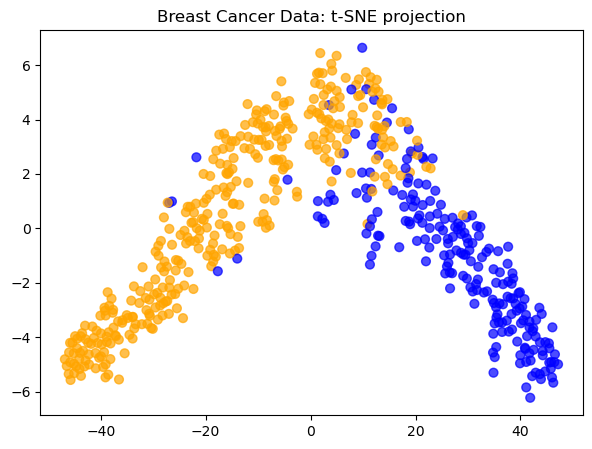

In [45]:
X, y = load_breast_cancer(return_X_y=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000, random_state=17)

X_tsne = tsne.fit_transform(X)

cmap = colors.ListedColormap(['blue', 'orange'])

plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(y), alpha=0.7, s=40)
plt.title('Breast Cancer Data: t-SNE projection')
plt.show()

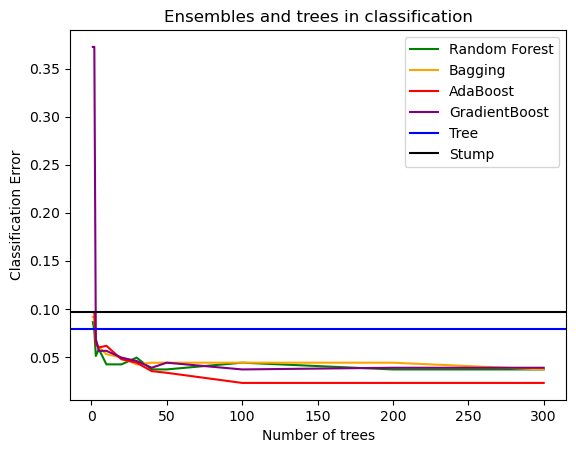

In [46]:
data = load_breast_cancer()
X = data.data
y = data.target

nfolds = 5
RFfeat = int(np.sqrt(X.shape[1]))
ntree = np.array([1, 2, 3, 5, 10, 20, 30, 40, 50, 100, 200, 300])


def score_gbc_class(m):
    model = GradientBoostingClassifier(n_estimators=m, learning_rate=0.1, max_depth=3)
    return np.mean(1-cross_val_score(model, X, y, cv=nfolds))


def score_ada_class(m):
    model = AdaBoostClassifier(n_estimators=m,algorithm='SAMME')
    return np.mean(1-cross_val_score(model, X, y, cv=nfolds))


def score_tree_class(depth=1):
    model = DecisionTreeClassifier(max_depth=depth)
    return np.mean(1-cross_val_score(model, X, y, cv=nfolds))


def score_rf_class(nt):
    model = RandomForestClassifier(n_estimators=nt, max_features=RFfeat)
    return np.mean(1-cross_val_score(model, X, y, cv=nfolds))


def score_bag_class(nt):
    model = BaggingClassifier(n_estimators=nt)
    return np.mean(1-cross_val_score(model, X, y, cv=nfolds))


error_rf_class = list(map(score_rf_class, ntree))
error_bag_class = list(map(score_bag_class, ntree))
error_ada_class = list(map(score_ada_class, ntree))
error_gbc_class = list(map(score_gbc_class, ntree))

error_tree = score_tree_class(None)
error_decision_stump = score_tree_class(1)

error_decision_stump

plt.plot(ntree, error_rf_class, color='green')
plt.plot(ntree, error_bag_class, color='orange')
plt.plot(ntree, error_ada_class, color='red')
plt.plot(ntree, error_gbc_class, color='purple')
plt.axhline(error_tree, color='blue')
plt.axhline(error_decision_stump, color='black')
plt.legend(['Random Forest', 'Bagging', 'AdaBoost',
           'GradientBoost', 'Tree', 'Stump'])
plt.xlabel('Number of trees')
plt.ylabel('Classification Error')
plt.title('Ensembles and trees in classification')
plt.show()

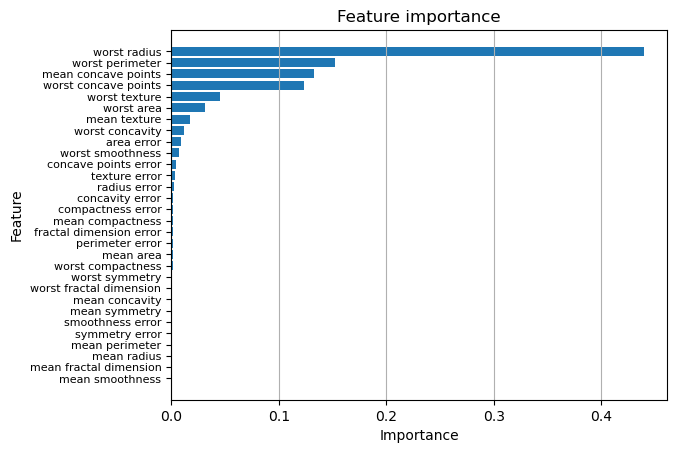

In [47]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3).fit(X, y)

feat_imp = model.feature_importances_
feat_names = data.feature_names

feat_idx = np.argsort(feat_imp)
plt.barh(feat_names[feat_idx], feat_imp[feat_idx])
plt.grid(axis='x')
plt.title('Feature importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.yticks(fontsize=8)
plt.show()

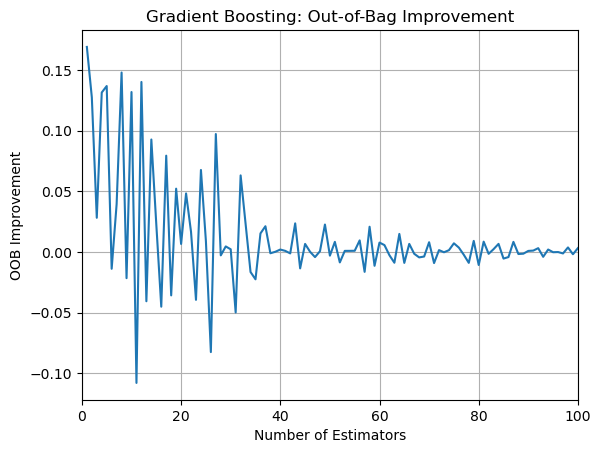

In [48]:
n_estimators = 100

model = GradientBoostingClassifier(
    n_estimators=n_estimators, 
    learning_rate=0.1,
    max_depth=3, 
    subsample=0.9
).fit(X, y)

plt.plot(np.arange(1, n_estimators+1), model.oob_improvement_)
plt.title('Gradient Boosting: Out-of-Bag Improvement')
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Improvement')
plt.xlim(0, n_estimators)
plt.grid()
plt.show()